In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [230]:
data = pd.read_csv('dataset.csv')
data.head(10)

,Data Ke -I,Fitur X,Fitur Y,Fitur Z
0,1,3,4,5
1,2,4,5,6
2,3,7,8,5
3,4,1,7,3
4,5,5,2,5
5,6,8,8,9
6,7,3,7,3
7,8,5,5,5
8,9,2,9,6
9,10,6,7,4


In [231]:
data = data.loc[:, ['Fitur X', 'Fitur Y', 'Fitur Z']]
data.head(2)

,Fitur X,Fitur Y,Fitur Z
0,3,4,5
1,4,5,6


In [232]:
X = data.values
X[:5]

array([[3, 4, 5],
       [4, 5, 6],
       [7, 8, 5],
       [1, 7, 3],
       [5, 2, 5]], dtype=int64)

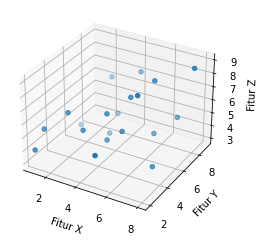

In [233]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])
ax.set_xlabel('Fitur X')
ax.set_ylabel('Fitur Y')
ax.set_zlabel('Fitur Z')
plt.show()

In [40]:
def calculate_cost(X, centroids, cluster):
    sum = 0
    for i, val in enumerate(X):
        
    

SyntaxError: unexpected EOF while parsing (<ipython-input-40-28c8c68de7a6>, line 5)

In [217]:
def kmeans(X, k):
    diff = 1
    cluster = np.zeros(X.shape[0])
    
    random_indices = np.random.choice(len(X), size=k, replace=False)
    centroids = X[random_indices, :]
    
    while diff:
        for i, row in enumerate(X):
            mn_dist = float('inf')
            for idx, centroid in enumerate(centroids):
                sum_sqrt = 0
                for j in range(X.shape[1]):
                    sum_sqrt += (centroid[j]-row[j])**2
                d = np.sqrt(sum_sqrt)
                
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
                    
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
        
        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = 0
        else:
            centroids = new_centroids
    return centroids, cluster
        

In [234]:
centroids, cluster = kmeans(X, 4)
data['cluster'] = cluster
data

,Fitur X,Fitur Y,Fitur Z,cluster
0,3,4,5,0.0
1,4,5,6,1.0
2,7,8,5,3.0
3,1,7,3,2.0
4,5,2,5,1.0
5,8,8,9,3.0
6,3,7,3,2.0
7,5,5,5,1.0
8,2,9,6,2.0
9,6,7,4,1.0


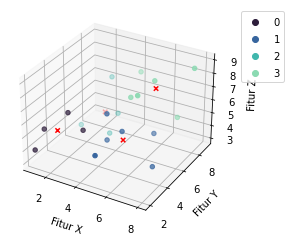

In [235]:
# sns.scatterplot(X[:,0], X[:,1], palette=['gray','orange','brown','dodgerblue'], hue=cluster)
# sns.scatterplot(centroids[:,0], centroids[:,1], s=100, color='red')
# plt.xlabel('Fitur X')
# plt.ylabel('Fitur Y')
# plt.show()
new_X = data.values

fig = plt.figure()
ax = fig.gca(projection='3d')
cmap = ListedColormap(sns.color_palette("mako").as_hex())

sc = ax.scatter(X[:,0], X[:,1], X[:,2], c=cluster, marker="o", cmap=cmap)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], marker="x", color="red")

ax.set_xlabel('Fitur X')
ax.set_ylabel('Fitur Y')
ax.set_zlabel('Fitur Z')
plt.show()

In [240]:
sum_cluster = [0, 0, 0, 0]
for c in cluster:
    sum_cluster[int(c)] += 1

for i, sum in enumerate(sum_cluster):
    print("Cluster", i, ":", sum)

Cluster 0 : 4
Cluster 1 : 6
Cluster 2 : 4
Cluster 3 : 6
